In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.utils.data_utils import pad_sequences
import pandas as pd
import data


train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

print(train_df.isnull().sum())
print(train_df.shape)

2023-04-21 12:51:23.933684: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


id           0
tid1         0
tid2         0
title1_en    0
title2_en    0
label        0
dtype: int64
(256442, 6)


In [2]:

train_df["title1_en"] = train_df["title1_en"].apply(data.preprocess_text)
train_df["title2_en"] = train_df["title2_en"].apply(data.preprocess_text)
test_df["title1_en"] = test_df["title1_en"].apply(data.preprocess_text)
test_df["title2_en"] = test_df["title2_en"].apply(data.preprocess_text)

# Concatenate the two titles into a single string
train_df['text'] = train_df['title1_en'] + ' ' + train_df['title2_en']
test_df['text'] = test_df['title1_en'] + ' ' + test_df['title2_en']

label_dict = {'agreed': 0, 'disagreed': 1, 'unrelated': 2}
train_df['label_num'] = train_df['label'].apply(lambda x: label_dict[x])

max_features = 2000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(train_df['text'])

# convert the text sequences to integer sequences
train_sequences = tokenizer.texts_to_sequences(train_df['text'].values)
# train_matrix = tokenizer.texts_to_matrix(train_df['text'].values, mode='tfidf')
# pad the sequences to have the same length
max_length = max([len(seq) for seq in train_sequences])
train_data = pad_sequences(train_sequences, maxlen=max_length)

train_labels = keras.utils.to_categorical(train_df['label_num'].values)

# print(max_features, train_matrix.shape, train_data.shape, len(tokenizer.word_index))
train_data.shape

(256442, 510)

In [3]:
# LSTM
embedding_dim = 100
model = Sequential()
model.add(layers.Embedding(len(tokenizer.word_index)+1, embedding_dim, input_length=max_length))
model.add(layers.LSTM(100, dropout=0.5, recurrent_dropout=0))
# Add a classifier
model.add(layers.Dense(3, activation="softmax"))


model.compile(keras.optimizers.SGD(0.001), "categorical_crossentropy", metrics=['accuracy'])

history = model.fit(train_data, train_labels, batch_size=128, epochs=3, validation_split=0.3)


Metal device set to: AMD Radeon Pro 5300M

systemMemory: 16.00 GB
maxCacheSize: 1.99 GB



2023-04-21 12:51:45.875463: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-21 12:51:45.876798: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-21 12:51:45.876844: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-21 12:51:45.877211: I tensorflow/core/common_runtime/pluggable_device/plug

Epoch 1/10


2023-04-21 12:51:48.353810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-21 12:51:48.657141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-21 12:51:52.595643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1002/1002 [==============================] - ETA: 0s - loss: 0.9044 - accuracy: 0.6719

2023-04-21 12:59:23.269774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-21 12:59:23.372781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1002/1002 [==============================] - 715s 704ms/step - loss: 0.9044 - accuracy: 0.6719 - val_loss: 0.7837 - val_accuracy: 0.6930
Epoch 2/10
1002/1002 [==============================] - 743s 741ms/step - loss: 0.7520 - accuracy: 0.6765 - val_loss: 0.7260 - val_accuracy: 0.6930
Epoch 3/10
1002/1002 [==============================] - 780s 778ms/step - loss: 0.7195 - accuracy: 0.6765 - val_loss: 0.7163 - val_accuracy: 0.6930
Epoch 4/10
1002/1002 [==============================] - ETA: 0s - loss: 0.7115 - accuracy: 0.6765

KeyboardInterrupt: 

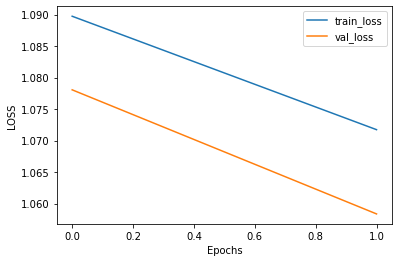

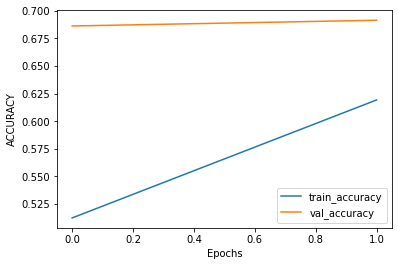

In [ ]:
import plot
# Plot history
plot.plot_history(history, 'loss', 'val_loss')
plot.plot_history(history, 'accuracy', 'val_accuracy')
